In [3]:
#!pip install -q kaggle

In [4]:
#conda install -c conda-forge keras
#conda install -c conda-forge seaborn
#conda install -c conda-forge librosa
#!pip install librosa
#!pip install pandas==0.24.0

SyntaxError: invalid syntax (<ipython-input-4-cd38ce5abd73>, line 1)

In [14]:
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Other  
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd  # To play sound in the notebook

In [7]:
#!mkdir ~/.kaggle

The syntax of the command is incorrect.


In [8]:
conda list

# packages in environment at C:\Users\sean\Anaconda3:
Note: you may need to restart the kernel to use updated packages.
#
# Name                    Version                   Build  Channel
_ipyw_jlab_nb_ext_conf    0.1.0                    py38_0  
absl-py                   0.12.0                   pypi_0    pypi
alabaster                 0.7.12                     py_0  
anaconda                  2020.11                  py38_0  
anaconda-client           1.7.2                    py38_0  
anaconda-navigator        1.10.0                   py38_0  
anaconda-project          0.8.4                      py_0  
appdirs                   1.4.4                    pypi_0    pypi
argh                      0.26.2                   py38_0  
argon2-cffi               20.1.0           py38he774522_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.4.2                    py38_0  
astropy                   4.0.2            py38he774522_0  
astunparse         

In [10]:
import pandas as pd       
import os 
import math 
import numpy as np
import matplotlib.pyplot as plt  
import IPython.display as ipd  # To play sound in the notebook
import librosa
import librosa.display
import os

In [11]:
#load the data 
df = pd.read_csv("C:\Users\sean\Documents\Programming\Hackathons\archive", header=0)
# Check the data
print(df.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df.head())

#speakers_all.csv not in .kaggle folder

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-11-783eb2320c13>, line 2)

In [10]:
print(df.shape)
print(df.head())

(2172, 12)
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


In [11]:
df.head()

age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN

In [12]:
#dropping missing audio files
df.drop(df.columns[9:12],axis = 1, inplace = True)
df.drop(df.index[df['file_missing?'] == True], inplace = True)
df.drop(df.index[df['filename'] == "sinhalese1"], inplace = True)
df.drop(df.index[df['filename'] == "nicaragua"], inplace = True)

<AxesSubplot:>

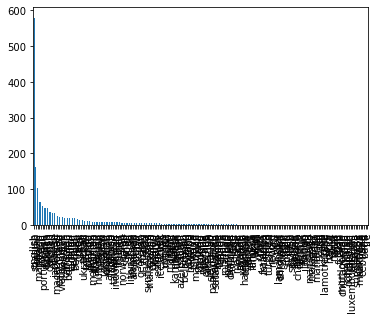

In [13]:
df['native_language'].value_counts().plot(kind='bar')

In [62]:
df.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False).head(10)
#lower number of Hindi speaker although it's the 4th most spoken language

count       mean        std   min    25%   50%    75%   max
native_language                                                             
english          579.0  34.482729  16.734510   6.0  21.00  29.0  44.00  90.0
spanish          162.0  34.129630  13.972528  17.0  23.00  30.0  45.00  80.0
arabic           102.0  30.950980  12.047248  18.0  21.25  28.0  38.00  70.0
mandarin          65.0  30.015385   8.193924  18.0  24.00  28.0  34.00  53.0
french            63.0  33.333333  16.246091  18.0  21.00  27.0  39.00  78.0
korean            52.0  33.230769  12.718083  18.0  22.00  29.5  43.50  62.0
portuguese        48.0  29.625000  10.487328  18.0  22.00  26.0  36.25  65.0
russian           48.0  34.145833  15.533066  18.0  24.00  28.5  37.00  84.0
dutch             47.0  28.765957  11.876562  18.0  21.00  23.0  35.50  68.0
turkish           37.0  25.081081   5.889625  18.0  21.00  24.0  27.00  45.0

In [15]:
df.groupby("country")['age'].describe().sort_values(by=['count'],ascending=False)
#note: more native_language(214 rows) than country-of-orgin(176 rows)

count       mean        std   min    25%   50%   75%   max
country                                                                      
usa                391.0  35.471867  17.911119   6.0  21.00  29.0  46.0  90.0
china               88.0  29.477273   9.654940  18.0  23.00  27.0  33.0  72.0
uk                  67.0  33.104478  14.900818  18.0  20.00  30.0  38.0  71.0
india               58.0  30.965517  11.575785  18.0  22.00  28.0  35.0  64.0
canada              54.0  31.629630  14.713998  18.0  21.25  26.5  37.5  78.0
...                  ...        ...        ...   ...    ...   ...   ...   ...
haiti                1.0  35.000000        NaN  35.0  35.00  35.0  35.0  35.0
guatemala            1.0  50.000000        NaN  50.0  50.00  50.0  50.0  50.0
gabon                1.0  26.000000        NaN  26.0  26.00  26.0  26.0  26.0
equatorial guinea    1.0  20.000000        NaN  20.0  20.00  20.0  20.0  20.0
faroe islands        1.0  28.000000        NaN  28.0  28.00  28.0  28.0  28.0

[176 rows x 8 columns]

In [16]:
df.groupby("birthplace")['age'].describe().sort_values(by=['count'],ascending=False)

#very scarce - 1290 rows with very few observations in each one
#birthplace and country relationship...? Does birthplace = country or can there be a South Korean living in another country like China or USA?

count       mean        std   min    25%   50%  \
birthplace                                                                     
seoul, south korea             25.0  32.040000  12.300000  18.0  23.00  27.0   
skopje, macedonia              21.0  20.047619   1.160870  19.0  19.00  20.0   
hong kong, china               19.0  23.473684   4.753577  18.0  19.50  22.0   
addis ababa, ethiopia          16.0  28.875000   8.663140  20.0  22.50  27.5   
jiddah, saudi arabia           14.0  28.214286  10.445305  18.0  21.25  24.0   
...                             ...        ...        ...   ...    ...   ...   
jaipur, india                   1.0  43.000000        NaN  43.0  43.00  43.0   
jalandhar, india                1.0  42.000000        NaN  42.0  42.00  42.0   
jalisco, mexico                 1.0  45.000000        NaN  45.0  45.00  45.0   
jamshedpur, jharkhand, india    1.0  29.000000        NaN  29.0  29.00  29.0   
lewistown, pennsylvania, usa    1.0  47.000000        NaN  47.0  47.00  47.0   

                                75%   max  
birthplace                                 
seoul, south korea            40.00  62.0  
skopje, macedonia             20.00  24.0  
hong kong, china              27.00  33.0  
addis ababa, ethiopia         31.00  52.0  
jiddah, saudi arabia          34.25  56.0  
...                             ...   ...  
jaipur, india                 43.00  43.0  
jalandhar, india              42.00  42.0  
jalisco, mexico               45.00  45.0  
jamshedpur, jharkhand, india  29.00  29.0  
lewistown, pennsylvania, usa  47.00  47.0  

[1270 rows x 8 columns]

In [17]:
# file_missing
df.groupby("file_missing?")['age'].describe().sort_values(by=['count'],ascending=False)

count       mean        std  min   25%   50%   75%   max
file_missing?                                                           
False          2138.0  33.076941  14.449986  0.0  22.0  28.0  41.0  97.0

In [18]:
#total audio file given
#why 2138 when false count is 2140 above?
print (len([name for name in os.listdir('recordings/recordings') if os.path.isfile(os.path.join('recordings/recordings', name))]))

2138


In [19]:
# filename column. This time we just print out the first 10 records. 
df.groupby("filename")['age'].describe().sort_values(by=['count'],ascending=False).head(10)

#files with the same filnames,  also filenames with missing audio files (at the end)

count  mean  std   min   25%   50%   75%   max
filename                                                  
afrikaans1    1.0  27.0  NaN  27.0  27.0  27.0  27.0  27.0
mandarin34    1.0  31.0  NaN  31.0  31.0  31.0  31.0  31.0
mandarin47    1.0  28.0  NaN  28.0  28.0  28.0  28.0  28.0
mandarin46    1.0  43.0  NaN  43.0  43.0  43.0  43.0  43.0
mandarin45    1.0  42.0  NaN  42.0  42.0  42.0  42.0  42.0
mandarin44    1.0  21.0  NaN  21.0  21.0  21.0  21.0  21.0
mandarin43    1.0  24.0  NaN  24.0  24.0  24.0  24.0  24.0
mandarin42    1.0  47.0  NaN  47.0  47.0  47.0  47.0  47.0
mandarin41    1.0  34.0  NaN  34.0  34.0  34.0  34.0  34.0
mandarin40    1.0  28.0  NaN  28.0  28.0  28.0  28.0  28.0

In [20]:
df.groupby("filename")['file_missing?'].describe().sort_values(by=['count'],ascending=False).head(40)
#top 10 filnames with the highest # of 'file_missing?'
#matching the names of duplicate filenames above -> duplicate filenames have missing audio files

count unique    top freq
filename                           
afrikaans1     1      1  False    1
mandarin34     1      1  False    1
mandarin47     1      1  False    1
mandarin46     1      1  False    1
mandarin45     1      1  False    1
mandarin44     1      1  False    1
mandarin43     1      1  False    1
mandarin42     1      1  False    1
mandarin41     1      1  False    1
mandarin40     1      1  False    1
mandarin4      1      1  False    1
mandarin39     1      1  False    1
mandarin38     1      1  False    1
mandarin37     1      1  False    1
mandarin36     1      1  False    1
mandarin35     1      1  False    1
mandarin33     1      1  False    1
mandarin19     1      1  False    1
mandarin32     1      1  False    1
mandarin31     1      1  False    1
mandarin30     1      1  False    1
mandarin3      1      1  False    1
mandarin29     1      1  False    1
mandarin28     1      1  False    1
mandarin27     1      1  False    1
mandarin26     1      1  False    1
mandarin25     1      1  False    1
mandarin24     1      1  False    1
mandarin23     1      1  False    1
mandarin22     1      1  False    1
mandarin21     1      1  False    1
mandarin20     1      1  False    1
mandarin48     1      1  False    1
mandarin49     1      1  False    1
mandarin5      1      1  False    1
mandarin50     1      1  False    1
mende2         1      1  False    1
mende1         1      1  False    1
mauritian2     1      1  False    1
mauritian1     1      1  False    1

In [21]:
# lets have a listen to a male voice. 
print(df.groupby("filename")['sex'].describe().head(10))
fname3 = 'recordings/recordings/' + 'agni1.mp3'   
ipd.Audio(fname3)

#will later compare different accents between the same gender: ex. afrikaans2, albanian1

           count unique     top freq
filename                            
afrikaans1     1      1  female    1
afrikaans2     1      1    male    1
afrikaans3     1      1    male    1
afrikaans4     1      1    male    1
afrikaans5     1      1    male    1
agni1          1      1    male    1
akan1          1      1    male    1
albanian1      1      1    male    1
albanian2      1      1    male    1
albanian3      1      1    male    1


In [22]:
#read in the audio files
fname1 = 'recordings/recordings/' + 'afrikaans1.mp3'
ipd.Audio(fname1)

In [23]:
#US Southern Accent
print(df[df['birthplace'].str.contains("kentucky",na=False)])
fname4 = 'recordings/recordings/' + 'english385.mp3'   
ipd.Audio(fname4)

      age  age_onset                   birthplace    filename native_language  \
420  31.0        0.0   brownsville, kentucky, usa  english150         english   
463  53.0        0.0    louisville, kentucky, usa   english19         english   
667  22.0        0.0  russellville, kentucky, usa  english373         english   
676  85.0        0.0   pike county, kentucky, usa  english381         english   
680  77.0        0.0       mcveigh, kentucky, usa  english385         english   
766  20.0        0.0       paducah, kentucky, usa  english462         english   

        sex  speakerid country  file_missing?  
420    male        527     usa          False  
463    male         76     usa          False  
667    male       1308     usa          False  
676    male       1324     usa          False  
680  female       1328     usa          False  
766    male       1564     usa          False  


In [24]:
# Play male from albany
fname_m = 'recordings/recordings/' + 'albanian1.mp3'
ipd.Audio(fname_m)

# Play male from albany
fname3 = 'recordings/recordings/' + 'albanian2.mp3'   
ipd.Audio(fname3)

In [25]:
!pip install ffmpeg

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'Audio sampled at 44100 hrz')

<Figure size 864x216 with 0 Axes>

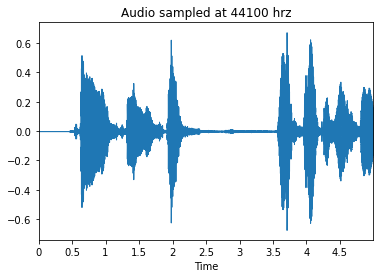

In [26]:
# The full 'high fidelity' sampling rate of 44k 
# english381 - male version
SAMPLE_RATE = 44100
fname_f = 'recordings/recordings/' + 'english381.mp3' 
y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 5)

plt.figure(figsize=(12, 3))
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title('Audio sampled at 44100 hrz')

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'Audio sampled at 6000 hrz')

<Figure size 864x216 with 0 Axes>

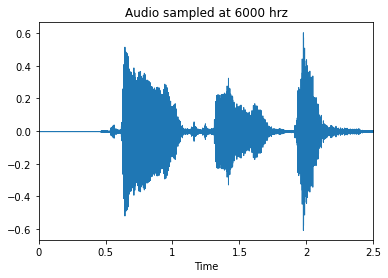

In [27]:
# The full 'low fidelity' sampling rate of 6k 
SAMPLE_RATE = 6000
fname_f = 'recordings/recordings/' + 'english381.mp3' 
y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 2.5)

plt.figure(figsize=(12, 3))
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title('Audio sampled at 6000 hrz')

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


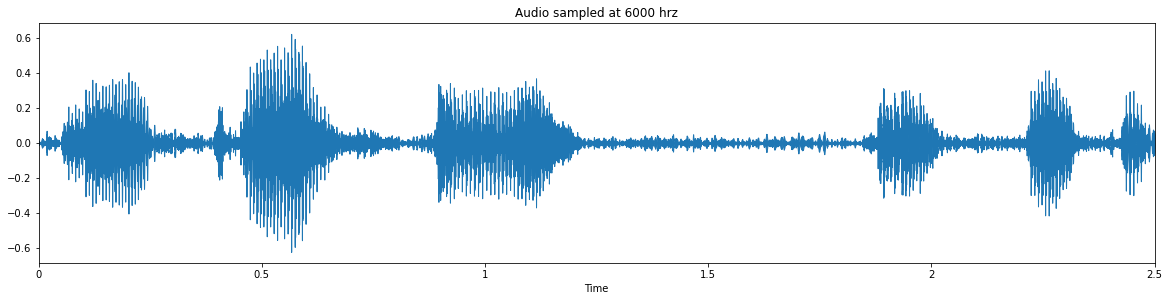

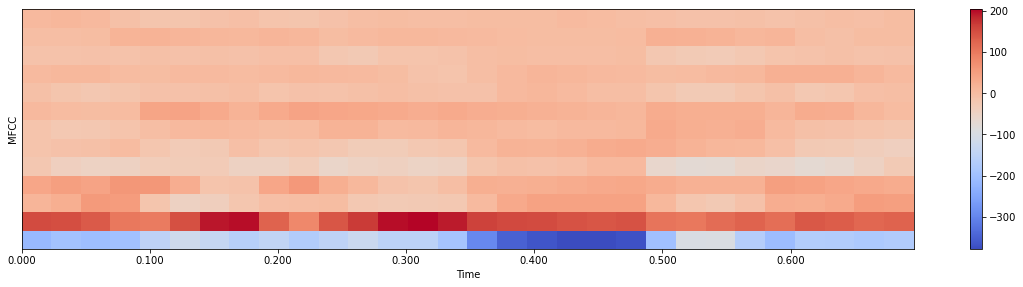

In [28]:
# listen to male version - albanian1
path = 'recordings/recordings/' + 'albanian1.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=6000,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 6000 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


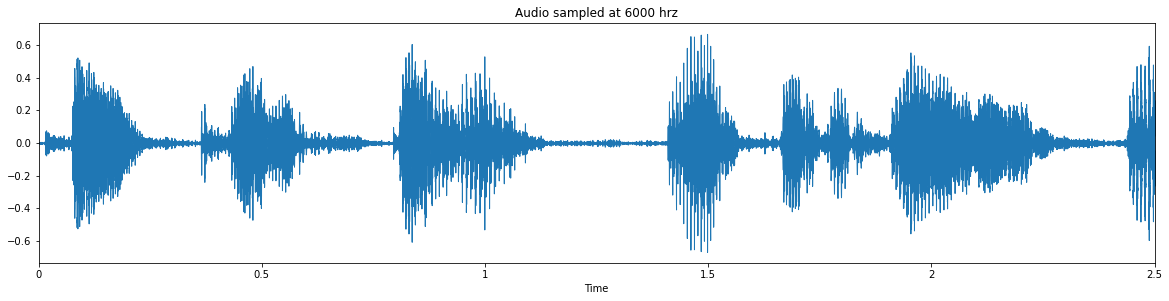

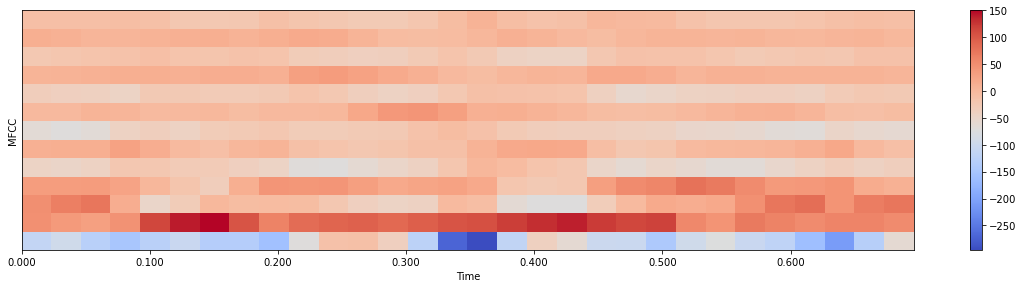

In [29]:

# listen to male version - afrikaans2
path = 'recordings/recordings/' + 'afrikaans2.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=6000,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 6000 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


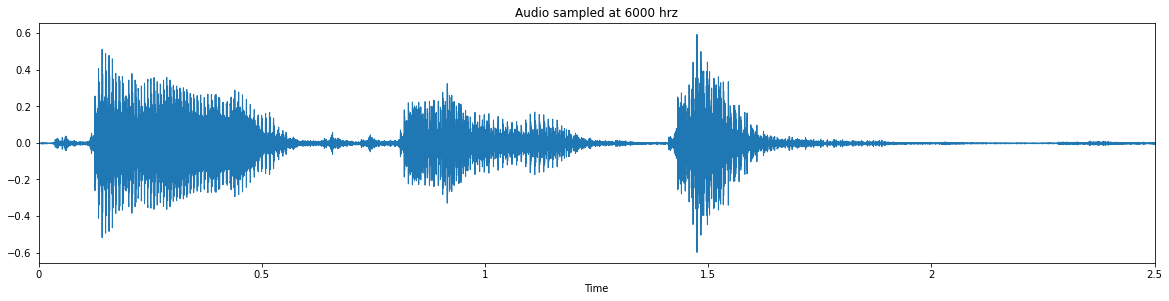

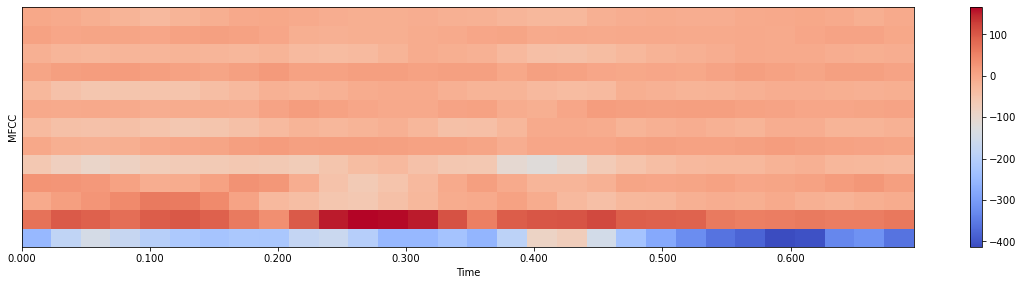

In [30]:
# listen to male version - english
path = 'recordings/recordings/' + 'english381.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=6000,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 6000 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


59
59
59
59
59


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


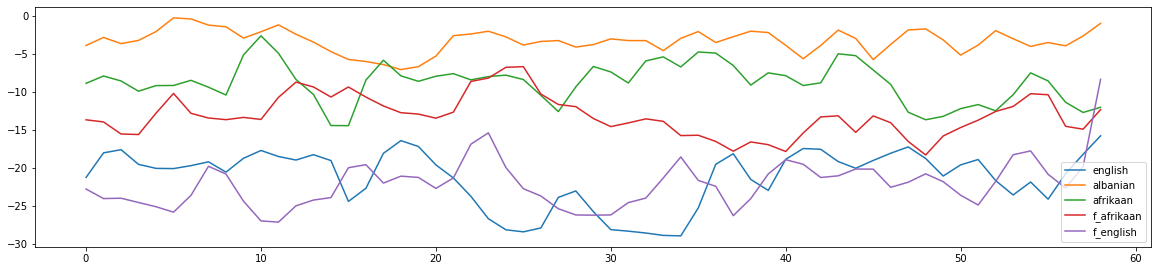

In [31]:
# Source - male English vs. Albanian vs. afrikaans
path = 'recordings/recordings/' + 'english381.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=5,sr=6000,offset=0.5)  
english = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
english = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(english))

path = 'recordings/recordings/' + 'albanian1.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=5,sr=6000,offset=0.5)  
albanian = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
albanian = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(albanian))

path = 'recordings/recordings/' + 'afrikaans2.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=5,sr=6000,offset=0.5)  
afrikaan = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
afrikaan = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(afrikaan))

# Source - femail afrikaan vs. female english

path = 'recordings/recordings/' + 'afrikaans1.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=5,sr=6000,offset=0.5)  
f_afrikaan = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
f_afrikaan = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(f_afrikaan))

path = 'recordings/recordings/' + 'english385.mp3' 
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=5,sr=6000,offset=0.5)  
f_english = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
f_english = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(f_english))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(english, label='english')
plt.plot(albanian, label='albanian')
plt.plot(afrikaan, label='afrikaan')
plt.plot(f_afrikaan, label='f_afrikaan')
plt.plot(f_english, label='f_english')
plt.legend()

In [32]:
conda install -c conda-forge pydub

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [33]:
# split audio files on words using noize
from pydub import AudioSegment
from pydub.silence import split_on_silence

In [45]:
!mkdir ~/.kaggle/split_test

In [41]:
path = 'recordings/recordings/' + 'english381.mp3' 
sound = AudioSegment.from_mp3(path)
chunks = split_on_silence(sound, 
    # must be silent for at least half a second
    min_silence_len=20,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-35
)

for i, chunk in enumerate(chunks):
    chunk.export('split_test/chunk{0}.wav'.format(i), format="wav")

In [73]:
path = 'recordings/recordings/' + 'arabic25.mp3' 
ipd.Audio(path)

In [76]:
df.head()

age  age_onset                         birthplace    filename  \
32  27.0        9.0             virginia, south africa  afrikaans1   
33  40.0        5.0             pretoria, south africa  afrikaans2   
34  43.0        4.0  pretoria, transvaal, south africa  afrikaans3   
35  26.0        8.0             pretoria, south africa  afrikaans4   
36  19.0        6.0            cape town, south africa  afrikaans5   

   native_language     sex  speakerid       country  file_missing?  
32       afrikaans  female          1  south africa          False  
33       afrikaans    male          2  south africa          False  
34       afrikaans    male        418  south africa          False  
35       afrikaans    male       1159  south africa          False  
36       afrikaans    male       1432  south africa          False

In [51]:
print(df.filename.size)

2138


In [50]:
#sinhalese1 and nicaragua file also X exist in additon to 32 filemissing true ones
# counter=0
# for index,filename in enumerate(df.filename):
#   os.mkdir("split_test/%s" % filename)
#   path = 'recordings/recordings/{0}.mp3'.format(filename) 
#   sound = AudioSegment.from_mp3(path)
#   chunks = split_on_silence(sound, 
#       # must be silent for at least half a second
#       min_silence_len=30,

#       # consider it silent if quieter than -16 dBFS
#       silence_thresh=-30
#   )
#   counter+=1
#   for i, chunk in enumerate(chunks):
#     chunk.export('split_test/{0}/chunk{1}.wav'.format(filename,i), format="wav")

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Text(0.5, 1.0, 'Audio sampled at 44100 hrz')

<Figure size 864x216 with 0 Axes>

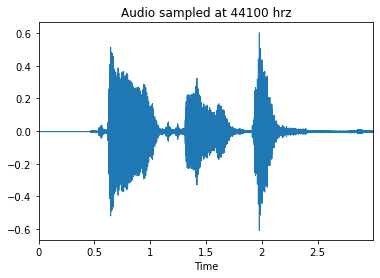

In [74]:
# The full 'high fidelity' sampling rate of 44k 
# english381 - male version
SAMPLE_RATE = 6000
fname_f = 'recordings/recordings/' + 'english381.mp3' 
y, sr = librosa.load(fname_f, sr=SAMPLE_RATE, duration = 3)

plt.figure(figsize=(12, 3))
plt.figure()
librosa.display.waveplot(y, sr=sr)
plt.title('Audio sampled at 44100 hrz')

Reduce the # of accents for efficiency

In [754]:
#load the data 
df_mod = pd.read_csv("speakers_all_modified.csv", header=0)
# Check the data
print(df_mod.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df_mod.head())

(172, 9) is the shape of the dataset
------------------------
   age  age_onset                  birthplace filename native_language  \
0   27        2.0  nagpur, maharashtra, india   hindi1           hindi   
1   19       10.5            new delhi, india  hindi10           hindi   
2   20        4.0           chandigarh, india  hindi11           hindi   
3   25        4.0            allahabad, india  hindi12           hindi   
4   43       13.0               jaipur, india  hindi13           hindi   

      sex  speakerid country  file_missing?  
0    male        207   india          False  
1  female       1202   india          False  
2    male       1437   india          False  
3  female       1440   india          False  
4  female       1633   india          False  


In [198]:
#load the data 
df_mod_selected = pd.read_csv("/Users/suyeonlee/.kaggle/speakers_all_modified_selected.csv", header=0)
# Check the data
print(df_mod_selected.shape, 'is the shape of the dataset') 
print('------------------------') 
print(df_mod_selected.head())

(102, 9) is the shape of the dataset
------------------------
   age  age_onset                      birthplace    filename native_language  \
0   26         13  shanxi province, shanxi, china   mandarin1        mandarin   
1   19          3                  beijing, china  mandarin10        mandarin   
2   53         13              kao-hsiung, taiwan  mandarin11        mandarin   
3   23          1            singapore, singapore  mandarin12        mandarin   
4   29         13                  nantou, taiwan  mandarin13        mandarin   

      sex  speakerid    country  file_missing?  
0  female        256      china          False  
1    male        491      china          False  
2  female        607     taiwan          False  
3    male        623  singapore          False  
4    male        685     taiwan          False  


In [756]:
df_mod.head()

age  age_onset                  birthplace filename native_language  \
0   27        2.0  nagpur, maharashtra, india   hindi1           hindi   
1   19       10.5            new delhi, india  hindi10           hindi   
2   20        4.0           chandigarh, india  hindi11           hindi   
3   25        4.0            allahabad, india  hindi12           hindi   
4   43       13.0               jaipur, india  hindi13           hindi   

      sex  speakerid country  file_missing?  
0    male        207   india          False  
1  female       1202   india          False  
2    male       1437   india          False  
3  female       1440   india          False  
4  female       1633   india          False

<AxesSubplot:>

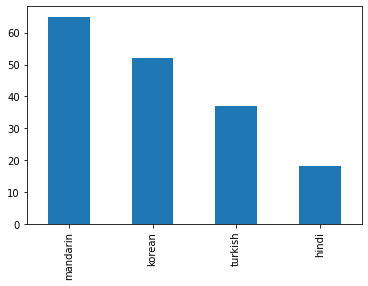

In [755]:
df_mod['native_language'].value_counts().plot(kind='bar')

In [758]:

for index,filename in enumerate(df_mod.filename):
    src = "recordings/recordings/{0}.mp3".format(filename)
    dst = "recordings/wave_file/{0}.wav".format(filename)

    # convert wav to mp3                                                            
    sound = AudioSegment.from_mp3(src)
    sound.export(dst, format="wav")

In [759]:
for index,filename in enumerate(df_mod.filename):
    filepath = "recordings/wave_file/{0}.wav".format(filename)

    sound = AudioSegment.from_file(filepath, format='wav', frame_rate=44100)
    sound = sound.set_frame_rate(11025)
    sound.export(filepath, format='wav')

In [173]:
print(df_mod.head())

   age  age_onset                  birthplace filename native_language  \
0   27        2.0  nagpur, maharashtra, india   hindi1           hindi   
1   19       10.5            new delhi, india  hindi10           hindi   
2   20        4.0           chandigarh, india  hindi11           hindi   
3   25        4.0            allahabad, india  hindi12           hindi   
4   43       13.0               jaipur, india  hindi13           hindi   

      sex  speakerid country  file_missing?  
0    male        207   india          False  
1  female       1202   india          False  
2    male       1437   india          False  
3  female       1440   india          False  
4  female       1633   india          False  


In [611]:
df_feature = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,filename in enumerate(df_mod.filename):
    path = 'recordings/recordings/{0}.mp3'.format(filename) 
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=6000
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    print(sample_rate)
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df_feature.loc[counter] = [mfccs]
    counter=counter+1   


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


6000
6000
6000
6000


/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


KeyboardInterrupt: 

In [607]:
# Check a few records to make sure its processed successfully
# only features listed
len(df_feature['feature'])

187

In [124]:
#create X dataframe
X = df_mod[["country","age", "sex"]]
X = pd.concat([X,pd.DataFrame(df_feature['feature'].values.tolist())],axis=1)
X[:5]

country  age     sex          0          1          2          3          4  \
0   india   27    male  -0.636883  -4.295461 -10.382984  -8.811654 -10.119096   
1   india   19  female -10.557673 -10.740553 -12.735470 -10.489289 -10.075623   
2   india   20    male -18.629101 -20.286650 -20.582851 -20.183628 -15.870351   
3   india   25  female -19.162266 -19.750662 -21.112732 -21.315334 -21.667238   
4   india   43  female -41.112614 -43.536087 -43.524490 -38.372734 -31.531839   

           5          6  ...         20         21         22         23  \
0  -6.961547  -7.484911  ...  -9.577598  -8.817772 -10.103983 -12.388015   
1 -10.625042  -9.746185  ... -11.183007 -11.283060 -11.150280 -11.324755   
2 -10.054979  -8.741342  ... -19.911388 -20.461399 -20.620182 -22.283409   
3 -20.811901 -20.154663  ... -15.478540 -17.920296 -19.951998 -20.506411   
4 -25.033836 -20.471842  ... -27.202213 -33.674389 -33.923073 -24.962923   

          24         25         26         27         28         29  
0 -13.385023 -14.102304 -12.169663  -9.985506 -12.167326 -15.612874  
1 -11.001319 -11.744043 -10.971839 -10.464971 -10.147200  -8.658195  
2 -20.424223 -14.061316  -8.822934  -6.741938  -7.884140  -9.568441  
3 -19.794746 -20.115885 -20.464779 -19.455961  -9.998825  -3.788920  
4 -21.785490 -24.617645 -29.213610 -24.051922 -21.980318 -24.792362  

[5 rows x 33 columns]

<AxesSubplot:>

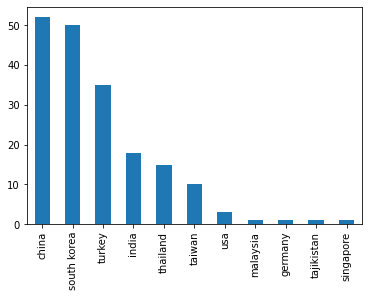

In [133]:
X['country'].value_counts().plot(kind='bar')

In [132]:
#one-hot encoding the string columns of x input
X['age'] = X['age'].astype(int)
X_encoded = pd.get_dummies(X, columns=["country","sex"])
X_encoded.head()

age          0          1          2          3          4          5  \
0   27  -0.636883  -4.295461 -10.382984  -8.811654 -10.119096  -6.961547   
1   19 -10.557673 -10.740553 -12.735470 -10.489289 -10.075623 -10.625042   
2   20 -18.629101 -20.286650 -20.582851 -20.183628 -15.870351 -10.054979   
3   25 -19.162266 -19.750662 -21.112732 -21.315334 -21.667238 -20.811901   
4   43 -41.112614 -43.536087 -43.524490 -38.372734 -31.531839 -25.033836   

           6          7          8  ...  country_malaysia  country_singapore  \
0  -7.484911  -8.457363 -11.258702  ...                 0                  0   
1  -9.746185  -7.608450  -7.162410  ...                 0                  0   
2  -8.741342  -9.772233 -11.879060  ...                 0                  0   
3 -20.154663 -20.858746 -20.319576  ...                 0                  0   
4 -20.471842 -22.393446 -27.065565  ...                 0                  0   

   country_south korea  country_taiwan  country_tajikistan  country_thailand  \
0                    0               0                   0                 0   
1                    0               0                   0                 0   
2                    0               0                   0                 0   
3                    0               0                   0                 0   
4                    0               0                   0                 0   

   country_turkey  country_usa  sex_female  sex_male  
0               0            0           0         1  
1               0            0           1         0  
2               0            0           0         1  
3               0            0           1         0  
4               0            0           1         0  

[5 rows x 44 columns]

In [125]:
df_combined = pd.concat([df_mod,pd.DataFrame(df_feature['feature'].values.tolist())],axis=1)
df_combined[:5]

age  age_onset                  birthplace filename native_language  \
0   27        2.0  nagpur, maharashtra, india   hindi1           hindi   
1   19       10.5            new delhi, india  hindi10           hindi   
2   20        4.0           chandigarh, india  hindi11           hindi   
3   25        4.0            allahabad, india  hindi12           hindi   
4   43       13.0               jaipur, india  hindi13           hindi   

      sex  speakerid country  file_missing?          0  ...         20  \
0    male        207   india          False  -0.636883  ...  -9.577598   
1  female       1202   india          False -10.557673  ... -11.183007   
2    male       1437   india          False -18.629101  ... -19.911388   
3  female       1440   india          False -19.162266  ... -15.478540   
4  female       1633   india          False -41.112614  ... -27.202213   

          21         22         23         24         25         26  \
0  -8.817772 -10.103983 -12.388015 -13.385023 -14.102304 -12.169663   
1 -11.283060 -11.150280 -11.324755 -11.001319 -11.744043 -10.971839   
2 -20.461399 -20.620182 -22.283409 -20.424223 -14.061316  -8.822934   
3 -17.920296 -19.951998 -20.506411 -19.794746 -20.115885 -20.464779   
4 -33.674389 -33.923073 -24.962923 -21.785490 -24.617645 -29.213610   

          27         28         29  
0  -9.985506 -12.167326 -15.612874  
1 -10.464971 -10.147200  -8.658195  
2  -6.741938  -7.884140  -9.568441  
3 -19.455961  -9.998825  -3.788920  
4 -24.051922 -21.980318 -24.792362  

[5 rows x 39 columns]

In [129]:
#create df for y value
y = df_combined[df_combined.columns[4:5]]
y.head()

native_language
0           hindi
1           hindi
2           hindi
3           hindi
4           hindi

In [145]:
#one-hot encoding the string columns of y output
Y_encoded = pd.get_dummies(y, columns=["native_language"])
Y_encoded.head()

native_language_hindi  native_language_korean  native_language_mandarin  \
0                      1                       0                         0   
1                      1                       0                         0   
2                      1                       0                         0   
3                      1                       0                         0   
4                      1                       0                         0   

   native_language_thai  native_language_turkish  
0                     0                        0  
1                     0                        0  
2                     0                        0  
3                     0                        0  
4                     0                        0

In [153]:
#split into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state=42)
# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)

In [154]:
X_train.head()

age          0          1          2          3          4          5  \
95    23 -24.846066 -26.004457 -25.826561 -21.418980 -16.209373 -16.574797   
69    34  -7.252813  -4.310207  -1.939381   4.043787   4.381162  -2.664934   
109   42 -39.498764 -41.187702 -43.260860 -42.467869 -43.073940 -43.479252   
29    23 -12.259975  -8.601876  -5.352926  -1.902696  -3.433174 -12.212910   
126   41 -11.271064 -10.690176  -8.487295  -8.443728  -6.559218  -5.706468   

             6          7          8  ...  country_malaysia  \
95  -20.100168 -18.525261 -16.055897  ...                 0   
69   -1.311823   2.205294   0.478283  ...                 0   
109 -43.538567 -41.848492 -36.366844  ...                 0   
29  -16.049128 -16.704205 -12.300060  ...                 0   
126  -4.008552  -5.971009 -10.639587  ...                 0   

     country_singapore  country_south korea  country_taiwan  \
95                   0                    0               1   
69                   0                    1               0   
109                  0                    0               0   
29                   0                    1               0   
126                  0                    0               0   

     country_tajikistan  country_thailand  country_turkey  country_usa  \
95                    0                 0               0            0   
69                    0                 0               0            0   
109                   0                 0               0            0   
29                    0                 0               0            0   
126                   0                 0               0            0   

     sex_female  sex_male  
95            1         0  
69            0         1  
109           1         0  
29            1         0  
126           1         0  

[5 rows x 44 columns]

In [155]:
y_train.head()

native_language
95         mandarin
69           korean
109        mandarin
29           korean
126        mandarin

In [156]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')
model.fit(X_train, y_train)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC()

In [143]:
model.support_vectors_

array([[ 20.        , -18.6291008 , -20.2866497 , ...,   0.        ,
          0.        ,   1.        ],
       [ 42.        , -18.95503044, -20.68709564, ...,   0.        ,
          0.        ,   1.        ],
       [ 23.        , -27.62002373, -27.56212044, ...,   0.        ,
          1.        ,   0.        ],
       ...,
       [ 27.        ,  -4.25223637,  -2.88781619, ...,   0.        ,
          0.        ,   1.        ],
       [ 25.        , -10.30134773,  -6.70053864, ...,   0.        ,
          0.        ,   1.        ],
       [ 26.        ,  -2.21006489,  -7.43354559, ...,   0.        ,
          1.        ,   0.        ]])

In [159]:
yhat = model.predict(X_test)

print(yhat[:10])

['mandarin' 'mandarin' 'mandarin' 'mandarin' 'mandarin' 'korean' 'korean'
 'mandarin' 'mandarin' 'mandarin']


In [160]:
accuracy_score(y_test, yhat).round(3)

0.132

In [140]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
#     # create grid to evaluate model
#     x = np.linspace(xlim[0], xlim[1], 30)
#     y = np.linspace(ylim[0], ylim[1], 30)
#     Y, X = np.meshgrid(y, x)
#     xy = np.vstack([X.ravel(), Y.ravel()]).T
#     P = model.decision_function(xy).reshape(X.shape)
    
#     # plot decision boundary and margins
#     ax.contour(X, Y, P, colors='k',
#                levels=[-1, 0, 1], alpha=0.5,
#                linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [161]:
path = '/Users/suyeonlee/Downloads/p2fa/test/BREY00538.wav' 
ipd.Audio(path)

In [162]:
#load the data 
speakers_all = pd.read_csv("/Users/suyeonlee/Downloads/speakers_all.csv", header=0)
# Check the data
print(speakers_all.shape, 'is the shape of the dataset') 
print('------------------------') 
print(speakers_all.head())

(2172, 12) is the shape of the dataset
------------------------
    age  age_onset              birthplace  filename native_language   sex  \
0  24.0       12.0         koussi, senegal   balanta         balanta  male   
1  18.0       10.0          buea, cameroon  cameroon        cameroon  male   
2  48.0        8.0  hong, adamawa, nigeria  fulfulde        fulfulde  male   
3  42.0       42.0   port-au-prince, haiti   haitian         haitian  male   
4  40.0       35.0   port-au-prince, haiti   haitian         haitian  male   

   speakerid   country  file_missing?  Unnamed: 9  Unnamed: 10 Unnamed: 11  
0        788   senegal           True         NaN          NaN         NaN  
1       1953  cameroon           True         NaN          NaN         NaN  
2       1037   nigeria           True         NaN          NaN         NaN  
3       1165     haiti           True         NaN          NaN         NaN  
4       1166     haiti           True         NaN          NaN         NaN  


In [165]:
speakers_all.groupby("native_language")['age'].describe().sort_values(by=['count'],ascending=False).head()
#lower number of Hindi speaker although it's the 4th most spoken language

count       mean        std   min    25%   50%   75%   max
native_language                                                            
english          579.0  34.482729  16.734510   6.0  21.00  29.0  44.0  90.0
spanish          162.0  34.129630  13.972528  17.0  23.00  30.0  45.0  80.0
arabic           102.0  30.950980  12.047248  18.0  21.25  28.0  38.0  70.0
mandarin          65.0  30.015385   8.193924  18.0  24.00  28.0  34.0  53.0
french            63.0  33.333333  16.246091  18.0  21.00  27.0  39.0  78.0

In [ ]:
src = "transcript.mp3"
dst = "test.wav"

# convert wav to mp3                                                            
sound = AudioSegment.from_mp3(src)
sound.export(dst, format="wav")

In [175]:
!mkdir wav_file

In [177]:
# loop feature extraction over the entire dataset
counter=0
for index,filename in enumerate(df_mod.filename):
    path = 'recordings/recordings/{0}.mp3'.format(filename) 
    os.mkdir("wav_file/%s" % filename)
    dst = 'wav_file/{0}/{0}.wav'.format(filename)
    sound = AudioSegment.from_mp3(path)
    sound.export(dst, format="wav")
    counter=counter+1   
print(counter)

172


In [179]:
filepath = 'wav_file/mandarin1/mandarin1.wav'
sound = AudioSegment.from_file(filepath, format='wav', frame_rate=44100)
sound = sound.set_frame_rate(11025)
sound.export(filepath, format='wav')

<_io.BufferedRandom name='wav_file/mandarin1/mandarin1.wav'>

In [199]:
# loop feature extraction over the entire dataset
counter=0
for index,filename in enumerate(df_mod_selected.filename):
    path = '/Users/suyeonlee/.kaggle/wav_file/{0}/{0}.wav'.format(filename)
    sending_path = '/Users/suyeonlee/Downloads/p2fa/test/{0}.wav'.format(filename)
    sound = AudioSegment.from_file(path, format='wav', frame_rate=44100)
    sound = sound.set_frame_rate(11025)
    sound.export(sending_path, format='wav')
    counter=counter+1   
print(counter)

102


In [183]:
os.chdir('/Users/suyeonlee/Downloads/p2fa')

In [195]:

os.chdir('/Users/suyeonlee/.kaggle')

In [186]:

counter=0
for index,filename in enumerate(df_mod.filename):
    file = "plp/{0}.plp".format(filename)
    f = open(file, "w")
    f.close()
    counter=counter+1   
print(counter)

172


In [188]:
counter=0
for index,filename in enumerate(df_mod.filename):
    file = "plp/{0}.lab".format(filename)
    f = open(file, "w")
    f.write("PLEASE\nCALL\nSTELLA\nASK\nHER\nTO\nBRING\nTHESE\nTHINGS\nWITH\nHER\nFROM\nTHE\nSTORE\nSIX\nSPOONS\nOF\nFRESH\nSNOW\nPEAS\nFIVE\nTHICK\nSLABS\nOF\nBLUE\nCHEESE\nAND\nMAYBE\nA\nSNACK\nFOR\nHER\nBROTHER\nBOB\nWE\nALSO\nNEED\nA\nSMALL\nPLASTIC\nSNAKE\nAND\nA\nBIG\nTOY\nFROG\nFOR\nTHE\nKIDS\nSHE\nCAN\nSCOOP\nTHESE\nTHINGS\nINTO\nTHREE\nRED\nBAGS\nAND\nWE\nWILL\nGO\nMEET\nHER\nWEDNESDAY\nAT\nTHE\nTRAIN\nSTATION")
    f.close()
    counter=counter+1   
print(counter)

172


In [191]:
counter=1
f = open("code.scp", "w")
for index,filename in enumerate(df_mod.filename):
    f.write("test/{0}.wav plp/{0}.plp\n".format(filename))
    counter=counter+1
f.close()
print(counter)

173


In [192]:
counter=1
f = open("test.scp", "w")
for index,filename in enumerate(df_mod.filename):
    f.write("plp/{0}.plp\n".format(filename))
    counter=counter+1
f.close()
print(counter)

173


Tokenize the Sentence

In [12]:
transcript_data = {'Transcript': ["PLEASE CALL STELLA ASK HER TO BRING THESE THINGS WITH HER FROM THE STORE SIX SPOONS OF FRESH SNOW PEAS FIVE THICK SLABS OF BLUE CHEESE AND MAYBE A SNACK FOR HER BROTHER BOB WE ALSO NEED A SMALL PLASTIC SNAKE AND A BIG TOY FROG FOR THE KIDS SHE CAN SCOOP THESE THINGS INTO THREE RED BAGS AND WE WILL GO MEET HER WEDNESDAY AT THE TRAIN STATION"]}  
  
# Create DataFrame to create a corpus
transcript_df = pd.DataFrame(transcript_data)  
  
# Print the output.  
print(transcript_df)  

                                          Transcript
0  PLEASE CALL STELLA ASK HER TO BRING THESE THIN...


In [15]:
# import tensorflow as tf

# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# Other imports for processing data
# import string

In [16]:

def tokenize_corpus(corpus, num_words=-1):
  # Fit a Tokenizer on the corpus
  if num_words > -1:
    tokenizer = Tokenizer(num_words=num_words)
  else:
    tokenizer = Tokenizer()
  tokenizer.fit_on_texts(corpus)
  return tokenizer

def create_corpus(dataset, field):
  # Remove all other punctuation
  dataset[field] = dataset[field].str.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  dataset[field] = dataset[field].str.upper()
  # Make it one long string to split by line
  lyrics = dataset[field].str.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

def create_corpus_string(string_rc):
  # Remove all other punctuation
  string_rc = string_rc.replace('[{}]'.format(string.punctuation), '')
  # Make it lowercase
  string_rc = string_rc.upper()
  # Make it one long string to split by line
  lyrics = string_rc.cat()
  corpus = lyrics.split('\n')
  # Remove any trailing whitespace
  for l in range(len(corpus)):
    corpus[l] = corpus[l].rstrip()
  # Remove any empty lines
  corpus = [l for l in corpus if l != '']

  return corpus

In [223]:
# Read the transcript from csv
dataset = pd.read_csv('transcript.csv', dtype=str)
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

In [224]:
dataset.head()

transcript
0  Please call Stella  Ask her to bring these thi...

In [400]:
# Create the corpus using the 'transcript' column containing the transcript
corpus = create_corpus(dataset, 'transcript')
# Tokenize the corpus
tokenizer = tokenize_corpus(corpus, num_words=100)
total_words = tokenizer.num_words


sequences = tokenizer.texts_to_sequences(c)
one_hot_results = tokenizer.texts_to_matrix(dataset['transcript'], mode='binary')
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

Found 55 unique tokens.


In [401]:
print(word_index)

{'her': 1, 'the': 2, 'and': 3, 'a': 4, 'these': 5, 'things': 6, 'of': 7, 'for': 8, 'we': 9, 'please': 10, 'call': 11, 'stella': 12, 'ask': 13, 'to': 14, 'bring': 15, 'with': 16, 'from': 17, 'store': 18, 'six': 19, 'spoons': 20, 'fresh': 21, 'snow': 22, 'peas': 23, 'five': 24, 'thick': 25, 'slabs': 26, 'blue': 27, 'cheese': 28, 'maybe': 29, 'snack': 30, 'brother': 31, 'bob': 32, 'also': 33, 'need': 34, 'small': 35, 'plastic': 36, 'snake': 37, 'big': 38, 'toy': 39, 'frog': 40, 'kids': 41, 'she': 42, 'can': 43, 'scoop': 44, 'into': 45, 'three': 46, 'red': 47, 'bags': 48, 'will': 49, 'go': 50, 'meet': 51, 'wednesday': 52, 'at': 53, 'train': 54, 'station': 55}


In [403]:
#transcript words tokenized
trans_sequences = tokenizer.texts_to_sequences(dataset['transcript'])
print(trans_sequences)

[[10, 11, 12, 13, 1, 14, 15, 5, 6, 16, 1, 17, 2, 18, 19, 20, 7, 21, 22, 23, 24, 25, 26, 7, 27, 28, 3, 29, 4, 30, 8, 1, 31, 32, 9, 33, 34, 4, 35, 36, 37, 3, 4, 38, 39, 40, 8, 2, 41, 42, 43, 44, 5, 6, 45, 46, 47, 48, 3, 9, 49, 50, 51, 1, 52, 53, 2, 54, 55]]


Korean

In [365]:
#korean
kr_phonemes = []
kr_word_total = []
kr_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("new_sound/korean_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    kr_word_total.append(kr_word_list)
                word_counter = 0
                new_person = True
                kr_phonemes.append(kr_word_total)
                kr_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    kr_word_total.append(kr_word_list)
                    kr_word_list = []
                    new_word = True
                    kr_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    kr_word_list.append(words[2])
        counter = counter+1

In [366]:
print(counter)

11618


In [369]:
len(kr_phonemes)

52

In [368]:
# kr_phonemes[0].pop(0)
# for i in kr_phonemes:
#     i.pop(0)

Hindi

In [359]:
#hindi
hd_phonemes = []
hd_word_total = []
hd_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("new_sound/hindi_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    hd_word_total.append(hd_word_list)
                word_counter = 0
                new_person = True
                hd_phonemes.append(hd_word_total)
                hd_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    hd_word_total.append(hd_word_list)
                    hd_word_list = []
                    new_word = True
                    hd_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    hd_word_list.append(words[2])
        counter = counter+1

In [360]:
print(counter)

4018


In [364]:
len(hd_phonemes)

18

In [362]:
# hd_phonemes[0].pop(0)
# for i in hd_phonemes:
#     i.pop(0)

Mandarin

In [352]:
#mandarin
md_phonemes = []
md_word_total = []
md_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("new_sound/mandarin_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    md_word_total.append(md_word_list)
                word_counter = 0
                new_person = True
                md_phonemes.append(md_word_total)
                md_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    md_word_total.append(md_word_list)
                    md_word_list = []
                    new_word = True
                    md_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    md_word_list.append(words[2])
        counter = counter+1

In [413]:
#all missing the 1st "please" of the first person
len(md_phonemes)

65

In [355]:
# md_phonemes[0].pop(0)
# for i in md_phonemes:
#     i.pop(0)

Turkish

In [346]:
#turkey
tk_phonemes = []
tk_word_total = []
tk_word_list = []
counter = 0
new_person = False
new_word = False
word_counter = 0
with open("new_sound/turkish_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1):
            if (words[0]=="."):
                if word_counter == 69: 
                    tk_word_total.append(tk_word_list)
                word_counter = 0
                new_person = True
                tk_phonemes.append(tk_word_total)
                tk_word_total = []
            else:
                if len(words)==5:
                    word_counter = word_counter+1
                    tk_word_total.append(tk_word_list)
                    tk_word_list = []
                    new_word = True
                    tk_word_list.append(words[2])
                else:
                    new_word = False

                if new_word == False:
                    tk_word_list.append(words[2])
        counter = counter+1

In [498]:
len(tk_phonemes[0])

68

In [351]:
print(tk_phonemes)

[[['K', 'AO1', 'L'], ['S', 'T', 'EH1', 'L', 'AH0'], ['AE1', 'S', 'K'], ['HH', 'ER0'], ['T', 'UW1'], ['B', 'R', 'IH1', 'NG'], ['DH', 'IY1', 'Z'], ['TH', 'IH1', 'NG', 'Z'], ['W', 'IH1', 'TH'], ['HH', 'ER0'], ['F', 'R', 'AH1', 'M'], ['DH', 'AH0'], ['S', 'T', 'AO1', 'R'], ['S', 'IH1', 'K', 'S'], ['S', 'P', 'UW1', 'N', 'Z'], ['AH1', 'V'], ['F', 'R', 'EH1', 'SH'], ['S', 'N', 'OW1'], ['P', 'IY1', 'Z'], ['F', 'AY1', 'V'], ['TH', 'IH1', 'K'], ['S', 'L', 'AE1', 'B', 'Z'], ['AH1', 'V'], ['B', 'L', 'UW1'], ['CH', 'IY1', 'Z'], ['AE1', 'N', 'D'], ['M', 'EY1', 'B', 'IY0'], ['AH0'], ['S', 'N', 'AE1', 'K'], ['F', 'AO1', 'R'], ['HH', 'ER0'], ['B', 'R', 'AH1', 'DH', 'ER0'], ['B', 'AA1', 'B'], ['W', 'IY1'], ['AO1', 'L', 'S', 'OW0'], ['N', 'IY1', 'D'], ['AH0'], ['S', 'M', 'AO1', 'L'], ['P', 'L', 'AE1', 'S', 'T', 'IH0', 'K'], ['S', 'N', 'EY1', 'K'], ['AE1', 'N', 'D'], ['EY1'], ['B', 'IH1', 'G'], ['T', 'OY1'], ['F', 'R', 'AA1', 'G'], ['F', 'AO1', 'R'], ['DH', 'IY0'], ['K', 'IH1', 'D', 'Z'], ['SH', 'IY1'], ['

In [348]:
# tk_phonemes[0].pop(0)
# for i in tk_phonemes:
#     i.pop(0)

[]

-----

In [396]:
df_mod_c = df_mod.copy()

In [397]:
df_mod_c = df_mod.copy()
df_mod_c.drop('speakerid', axis=1, inplace=True)
df_mod_c.drop('sex', axis=1, inplace=True)
df_mod_c.drop('file_missing?', axis=1, inplace=True)
df_mod_c.drop('birthplace', axis=1, inplace=True)
df_mod_c.drop('age_onset', axis=1, inplace=True)
df_mod_c.drop('age', axis=1, inplace=True)
df_mod_c.drop('country', axis=1, inplace=True)

In [399]:
df_mod_c.head()

filename native_language
0   hindi1           hindi
1  hindi10           hindi
2  hindi11           hindi
3  hindi12           hindi
4  hindi13           hindi

Find mfcc mean

In [ ]:
timeFrame = []
for i in range(3):
     timeFrame.append([i, i + 1])
print(rows)

turkey time frames

In [428]:
#turkey time frames
timeFrame_all = []
timeFrame_person = []
timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("new_sound/turkish_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    timeFrame_person.append(timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                timeFrame_all.append(timeFrame_person) #add all. record of the person to the total
                timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    timeFrame_person.append(timeFrame) 
                    timeFrame = []
                    new_word = True
                    timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    timeFrame.append([words[0], words[1]])
        counter = counter+1
        
timeFrame_all[0].pop(0)
for i in timeFrame_all:
    i.pop(0)

In [492]:
len(timeFrame_all[0])

69

In [431]:
print(counter)

8280


In [493]:
#missing very 1st time frame
print(timeFrame_all)

[[[['0', '12400000'], ['12400000', '12700000'], ['12700000', '14000000'], ['14000000', '14500000']], [['14500000', '16000000'], ['16000000', '16500000'], ['16500000', '17300000']], [['17300000', '18500000'], ['18500000', '19200000'], ['19200000', '21300000'], ['21300000', '23500000'], ['23500000', '24300000']], [['24300000', '25100000'], ['25100000', '25800000'], ['25800000', '26700000']], [['26700000', '27000000'], ['27000000', '28100000']], [['28100000', '29500000'], ['29500000', '30000000']], [['30000000', '30900000'], ['30900000', '31200000'], ['31200000', '32000000'], ['32000000', '34000000']], [['34000000', '34700000'], ['34700000', '35500000'], ['35500000', '36000000']], [['36000000', '39100000'], ['39100000', '39700000'], ['39700000', '41700000'], ['41700000', '44000000']], [['44000000', '45000000'], ['45000000', '45700000'], ['45700000', '46900000']], [['46900000', '47700000'], ['47700000', '48800000']], [['48800000', '50800000'], ['50800000', '51300000'], ['51300000', '521000

Korea Timeframes

In [449]:
#korea time frames
kr_timeFrame_all = []
kr_timeFrame_person = []
kr_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("new_sound/korean_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    kr_timeFrame_person.append(kr_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                kr_timeFrame_all.append(kr_timeFrame_person) #add all. record of the person to the total
                kr_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    kr_timeFrame_person.append(kr_timeFrame) 
                    kr_timeFrame = []
                    new_word = True
                    kr_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    kr_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
kr_timeFrame_all[0].pop(0)
for i in kr_timeFrame_all:
    i.pop(0)

In [497]:
len(kr_timeFrame_all[0])

69

Mandarin Timeframes

In [481]:
#mandarin time frames
md_timeFrame_all = []
md_timeFrame_person = []
md_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("new_sound/mandarin_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    md_timeFrame_person.append(md_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                md_timeFrame_all.append(md_timeFrame_person) #add all. record of the person to the total
                md_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    md_timeFrame_person.append(md_timeFrame) 
                    md_timeFrame = []
                    new_word = True
                    md_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    md_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
md_timeFrame_all[0].pop(0)
for i in md_timeFrame_all:
    i.pop(0)

In [484]:
len(md_timeFrame_all[0])

69

Hindi Timeframes

In [477]:
#hindi time frames
hd_timeFrame_all = []
hd_timeFrame_person = []
hd_timeFrame = []
counter = 0
new_person = True
new_word = False
word_counter = 0
with open("new_sound/hindi_align.mlf", "r") as a_file:
    for line in a_file:
        stripped_line = line.strip()
        words = stripped_line.split( )
        if (counter>0 and words[0].find(".rec")==-1): #not 1st, not a new person
            if (words[0]=="."): #indicating the end of a person's record
                if word_counter == 69: #last word
                    hd_timeFrame_person.append(hd_timeFrame) #add this last word's record to the list of the person
                word_counter = 0 #set to 0
                new_person = True #new person coming up
                hd_timeFrame_all.append(hd_timeFrame_person) #add all. record of the person to the total
                hd_timeFrame_person = [] #empty the person's record
            else: #can be 1st and a new person
                if len(words)==5: #new word
                    word_counter = word_counter+1
                    hd_timeFrame_person.append(hd_timeFrame) 
                    hd_timeFrame = []
                    new_word = True
                    hd_timeFrame.append([words[0], words[1]])
                else:
                    new_word = False

                if new_word == False:
                    hd_timeFrame.append([words[0], words[1]])
        counter = counter+1
        
hd_timeFrame_all[0].pop(0)
for i in hd_timeFrame_all:
    i.pop(0)

In [486]:
len(hd_timeFrame_all[0])

69

insert missing values

In [483]:
md_timeFrame_all[0].insert(0, [['0','11900001'],['11900001','12200001'],['12200001','14000001'],['14000001','14500001']])

In [485]:
hd_timeFrame_all[0].insert(0, [['0','4500000'],['4500000','4800000'],['4800000','5300000'],['5300000','6000000']])

In [491]:
#turkey
timeFrame_all[0].insert(0, [['0','12400000'],['12400000','12700000'],['12700000','14000000'],['14000000','14500000']])

In [496]:
kr_timeFrame_all[0].insert(0, [['0','17300000'],['17300000','17600000'],['17600000','18500000'],['18500000','19500000']])

In [501]:
kr_phonemes[0].insert(0,['P','L','IY1','Z'])

In [503]:
tk_phonemes[0].insert(0,['P','L','IY1','Z'])

In [505]:
md_phonemes[0].insert(0,['P','L','IY1','Z'])

In [507]:
hd_phonemes[0].insert(0,['P','L','IY1','Z'])

In [511]:
transcript = "Please call Stella  Ask her to bring these things with her from the store Six spoons of fresh snow peas five thick slabs of blue cheese and maybe a snack for her brother Bob We also need a small plastic snake and a big toy frog for the kids She can scoop these things into three red bags and we will go meet her Wednesday at the train station"
words = transcript.split()
words[:5]

['Please', 'call', 'Stella', 'Ask', 'her']

In [522]:
search = words[0].lower()
print(word_index[search])

10


One Hot Encoding

In [565]:
from sklearn.preprocessing import LabelBinarizer

In [558]:
words_encoder = LabelBinarizer()
words_encoder.fit(df_person['word'])
transformed = words_encoder.transform(df_person['word'])
# df_person = pd.concat([df_person, ohe_df], axis=1)

In [574]:
transformed[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [601]:
timeFrame_all[0][1]
#timeframes of the 2nd word of the 1st person

[['14500000', '16000000'], ['16000000', '16500000'], ['16500000', '17300000']]

In [587]:
# nanosecond -> second conversion
#tf = timeFrame_all[0][1]
# for i in tf:
#     for j in i:
#         print((int(j[0])/10000000 + 0.0125)*(11000/11025))
#         print((int(j[1])/10000000 + 0.0125)*(11000/11025))

0.012471755102040816
0.012472054421768707
0.012471755102040816
0.01247225396825397
0.012471755102040816
0.01247225396825397
0.012471755102040816
0.01247225396825397
0.012471755102040816
0.01247225396825397
0.012471755102040816
0.012472353741496599


In [594]:
timeFrame_all[0][0][0][0]

'0'

CONVERT ALL

In [660]:
tk_phonemes  #all phonemes of all speaker

[[['P', 'L', 'IY1', 'Z'],
  ['K', 'AO1', 'L'],
  ['S', 'T', 'EH1', 'L', 'AH0'],
  ['AE1', 'S', 'K'],
  ['HH', 'ER0'],
  ['T', 'UW1'],
  ['B', 'R', 'IH1', 'NG'],
  ['DH', 'IY1', 'Z'],
  ['TH', 'IH1', 'NG', 'Z'],
  ['W', 'IH1', 'TH'],
  ['HH', 'ER0'],
  ['F', 'R', 'AH1', 'M'],
  ['DH', 'AH0'],
  ['S', 'T', 'AO1', 'R'],
  ['S', 'IH1', 'K', 'S'],
  ['S', 'P', 'UW1', 'N', 'Z'],
  ['AH1', 'V'],
  ['F', 'R', 'EH1', 'SH'],
  ['S', 'N', 'OW1'],
  ['P', 'IY1', 'Z'],
  ['F', 'AY1', 'V'],
  ['TH', 'IH1', 'K'],
  ['S', 'L', 'AE1', 'B', 'Z'],
  ['AH1', 'V'],
  ['B', 'L', 'UW1'],
  ['CH', 'IY1', 'Z'],
  ['AE1', 'N', 'D'],
  ['M', 'EY1', 'B', 'IY0'],
  ['AH0'],
  ['S', 'N', 'AE1', 'K'],
  ['F', 'AO1', 'R'],
  ['HH', 'ER0'],
  ['B', 'R', 'AH1', 'DH', 'ER0'],
  ['B', 'AA1', 'B'],
  ['W', 'IY1'],
  ['AO1', 'L', 'S', 'OW0'],
  ['N', 'IY1', 'D'],
  ['AH0'],
  ['S', 'M', 'AO1', 'L'],
  ['P', 'L', 'AE1', 'S', 'T', 'IH0', 'K'],
  ['S', 'N', 'EY1', 'K'],
  ['AE1', 'N', 'D'],
  ['EY1'],
  ['B', 'IH1', 'G'],
  [

In [662]:
words[:5]

['Please', 'call', 'Stella', 'Ask', 'her']

In [665]:
len(hd_timeFrame_all[1])

69

In [766]:
def mean_extract(timeFrames, filenumber):
    path = 'recordings/recordings/turkish{0}.mp3'.format(filenumber)
    features = []
    for i in timeFrames:
        # convert to second
        startTime = (i[0]/10000000 + 0.0125)*(11000/11025)
        endTime = (i[1]/10000000 + 0.0125)*(11000/11025)
        time_duration = endTime - startTime
        X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=time_duration
                                  ,sr=44100
                                  ,offset=startTime
                                 )
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=6), axis=0)
        
        features.append(mfccs)
    return features

In [776]:
#hindi3,hindi5,6,8 - audio error skipping
#korean - no error
#mandarin - 7,8,9
person_cnt = 39
for person in tk_phonemes:
    cnt = 0
    rows = []
#     filename = 
    for word in words:
        word_tf = []
        mfccs = []
        search = word.lower()
        timeframes = timeFrame_all[person_cnt-1][cnt]
        for i in timeframes:
            timeframe = [int(i[0]), int(i[1])]
            word_tf.append(timeframe)
        rows.append([search, person[cnt], word_tf, word_index[search], transformed[cnt]])
        cnt+=1
        
    df_person = pd.DataFrame(rows, columns=["word", "phonemes","word_timeframes","word_index", "word_vec"])
    df_person.head()
    
    word_feature = pd.DataFrame(columns=['feature'])
    
    counter=0
    for index,timeframes in enumerate(df_person.word_timeframes):
        mfccs = mean_extract(timeframes, person_cnt)
        word_feature.loc[counter,'feature'] = mfccs
        counter=counter+1
    df_person = pd.concat([df_person,pd.DataFrame(word_feature['feature'].values.tolist())],axis=1)
    export_path = 'speaker_df_files/turkish{0}.csv'.format(person_cnt)
    df_person.to_csv(export_path)
    person_cnt+=1
print(person_cnt)

IndexError: list index out of range

In [736]:
timeFrame_all[5]

[[['0', '12700000'],
  ['12700000', '13500000'],
  ['13500000', '14700000'],
  ['14700000', '16300000']],
 [['16300000', '17500000'],
  ['17500000', '18500000'],
  ['18500000', '19400000']],
 [['19400000', '20500000'],
  ['20500000', '21300000'],
  ['21300000', '22100000'],
  ['22100000', '23100000'],
  ['23100000', '23500000']],
 [['23500000', '24400000'],
  ['24400000', '24800000'],
  ['24800000', '25100000']],
 [['25100000', '29500000'], ['29500000', '30800000']],
 [['30800000', '32600000'], ['32600000', '34100000']],
 [['34100000', '34700000'],
  ['34700000', '35100000'],
  ['35100000', '35400000'],
  ['35400000', '36600000']],
 [['36600000', '37200000'],
  ['37200000', '41500000'],
  ['41500000', '43200000']],
 [['43200000', '43700000'],
  ['43700000', '44100000'],
  ['44100000', '44700000'],
  ['44700000', '46600000']],
 [['46600000', '47100000'],
  ['47100000', '47800000'],
  ['47800000', '48600000']],
 [['48600000', '49800000'], ['49800000', '51200000']],
 [['51200000', '532000

In [735]:
#hindi5

cnt = 0
person = tk_phonemes[5]
# timeframes = timeFrame_all[0]
rows = []
for word in words:
    word_tf = []
    mfccs = []
    search = word.lower()
    timeframes = timeFrame_all[5][cnt]
    for i in timeframes:
        timeframe = [int(i[0]), int(i[1])]
        word_tf.append(timeframe)
    rows.append([search, person[cnt], word_tf, word_index[search], transformed[cnt]])
    cnt+=1

df_person_manual = pd.DataFrame(rows, columns=["word", "phonemes","word_timeframes","word_index", "word_vec"])
df_person_manual.head()

word             phonemes  \
0  please       [P, L, IY1, Z]   
1    call          [K, AO1, L]   
2  stella  [S, T, EH1, L, AH0]   
3     ask          [AE1, S, K]   
4     her            [HH, ER1]   

                                     word_timeframes  word_index  \
0  [[0, 12700000], [12700000, 13500000], [1350000...          10   
1  [[16300000, 17500000], [17500000, 18500000], [...          11   
2  [[19400000, 20500000], [20500000, 21300000], [...          12   
3  [[23500000, 24400000], [24400000, 24800000], [...          13   
4       [[25100000, 29500000], [29500000, 30800000]]           1   

                                            word_vec  
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...  
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...

In [777]:
def mean_extract_manual(timeFrames):
    features = []
    for i in timeFrames:
        # convert to second
        path = 'recordings/recordings/turkish6.mp3'
        startTime = (i[0]/10000000 + 0.0125)*(11000/11025)
        endTime = (i[1]/10000000 + 0.0125)*(11000/11025)
        time_duration = endTime - startTime
        X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=time_duration
                                  ,sr=44100
                                  ,offset=startTime
                                 )
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=6), axis='empty')
        
        features.append(mfccs)
    return features

In [738]:
word_feature = pd.DataFrame(columns=['feature'])

counter=0
for index,timeframes in enumerate(df_person_manual.word_timeframes):
#     print(timeframes)
    mfccs = mean_extract_manual(timeframes)
    word_feature.loc[counter,'feature'] = mfccs
    counter=counter+1
print(counter)

/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/internals/blocks.py:849: VisibleDeprecationWarning: Creating an ndarray from ragged neste

ValueError: can't extend empty axis 0 using modes other than 'constant' or 'empty'

In [688]:
word_feature["feature"][0]

[array([-116.43908 , -116.43908 , -116.43908 , -116.43908 , -114.50761 ,
        -106.02102 , -100.66059 ,  -71.97179 ,  -46.224598,  -20.632954,
         -13.481232], dtype=float32),
 array([-16.716394], dtype=float32),
 array([-29.085554, -35.710712], dtype=float32),
 array([-65.16234 , -73.8834  , -71.671104], dtype=float32)]

In [689]:
df_person_manual = pd.concat([df_person_manual,pd.DataFrame(word_feature['feature'].values.tolist())],axis=1)
df_person_manual.head()

word             phonemes  \
0  please       [P, L, IY1, Z]   
1    call          [K, AO1, L]   
2  stella  [S, T, EH1, L, AH0]   
3     ask          [AE1, S, K]   
4     her            [HH, ER1]   

                                     word_timeframes  word_index  \
0  [[0, 4700000], [4700000, 5000000], [5000000, 5...          10   
1  [[7100000, 8000000], [8000000, 8500000], [8500...          11   
2  [[9200000, 10600000], [10600000, 10900000], [1...          12   
3  [[13800000, 14100000], [14100000, 14400000], [...          13   
4       [[14700000, 18800000], [18800000, 19300000]]           1   

                                            word_vec  \
0  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...   
2  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3  [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                                   0                        1  \
0  [-116.43908, -116.43908, -116.43908, -116.4390...             [-16.716394]   
1                           [-58.890385, -48.545654]  [-25.534521, -22.18647]   
2     [-46.239407, -56.29713, -83.77432, -74.995026]             [-24.377653]   
3                                        [-81.58317]              [-90.40914]   
4  [-157.82518, -159.76935, -160.71376, -158.7092...  [-160.85873, -160.4052]   

                          2                                    3  \
0  [-29.085554, -35.710712]    [-65.16234, -73.8834, -71.671104]   
1   [-29.720629, -36.24876]                                 None   
2  [-20.073183, -19.406076]  [-25.577723, -33.30449, -44.954945]   
3              [-117.89687]                                 None   
4                      None                                 None   

                                     4     5     6  
0                                 None  None  None  
1                                 None  None  None  
2  [-54.196274, -64.81672, -109.41659]  None  None  
3                                 None  None  None  
4                                 None  None  None

In [690]:
#trying to export df to csv
df_person_manual.to_csv('speaker_df_files/hindi2compare.csv')

In [703]:

# Play male from albany
fname3 = 'recordings/recordings/' + 'hindi8.mp3'   
ipd.Audio(fname3)